# Week 1: Freeze out effect


### Mathijs Laan, Pepijn Clarijn, Kerwin Buysman, Harm van Leijen


First we load the neccasary packages and assign the constants:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import pandas as pd
from sympy.solvers import solve
from sympy import Symbol

M_p = 1.22 * 10**22       # the planck mass
G_f = 1.166 * 10**(-11)   # the Fermi constant
xhi_3 = 1.20205           # the riemann zeta function
M_w = 80.379 * 10**3      # Mass W-boson in MeV
sigma_times_v = 10**-8    # wimp-miracle <sigma * v>
T_now = 0.24 * 10**-9     # present temperature in MeV 
rho_crit = 8.6 * 10**-27  # The critical density

We want to do calculations to the thermal freeze-out of Dark Matter particles. This freeze-out occurs when:
    
$\Gamma(T_{fo}) = H(T_{fo}) $

To calculate this we first write out the Hubble rate as a function of temperature:

$H(T) = 1.66 g_{\star}^{\frac{1}{2}}\frac{T^{2}}{M_{p}}$

To get $g_{\star}$ we use WebPlotDigitizer and use the data from the Cosmology lecture notes from Christoph Weniger. This results in the following plot:

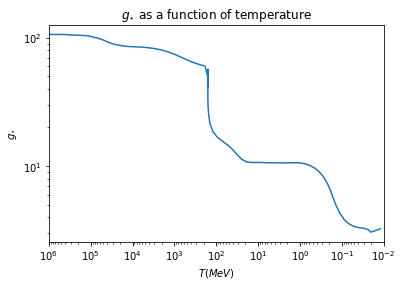

In [4]:
g = pd.read_csv(r'dataa.txt', sep=' ', skiprows = 0, 
                   names =['t','g'], index_col= False,na_values = 0)

plt.plot(g.t,g.g)
plt.xscale("log")
plt.yscale("log")
plt.title(r'$g_{\star}$ as a function of temperature')
plt.xlim(10**6,10**-2)
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$g_{\star}$')
plt.show()

We can now plot $H(T)$ as a function of temperature:

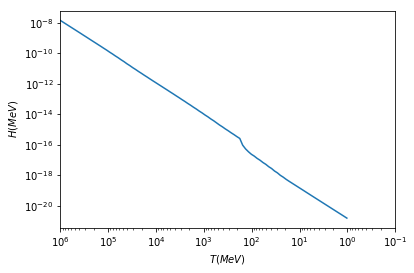

In [5]:
## This is the degrees of freedom of the DM particle
def g_value(T):
    return 4

## to match a random temperature with a value of g,
## we set the random temperature equal to its closest value of the data:
def g_ster(T):
    index = 0
    x_min = 100000
    while index < len(g.t):
        x = abs(g.t[index] - T)
        if x < x_min:
            place_to_be = index
            x_min = x

        index += 1
    return g.g[place_to_be]
    
### Here we make a logorithmic spaces list of temperatures
Temperature = np.logspace(0.01,6,100)

H_list = []
for T in Temperature:
    H = 1.66* g_ster(T)*T**2 / M_p
    H_list.append(H)

plt.plot(Temperature, H_list)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$T (MeV)$')
plt.ylabel(r'$H (MeV)$')
plt.xlim(10**6, 0.1)
plt.show()



Now we want to calculate how $\Gamma$ changes with the temperature. this $\Gamma$ can be given by:

$\Gamma = n \sigma v $

with n the number density, $\sigma$ the cross section and v the velocity. First we will do the calculations to case of hot dark matter. In this case the velocity is just to the speed of light (which can be set to 1). For the number density we can use the formula:

$n = \frac{\zeta(3)}{\pi^{2}}g T^{3} * a$

with a = 1 for bosons and a = $\frac{3}{4}$ for fermions

We will make some approximations for the cross-section of the particle. we could for example use:

$ \sigma = \frac{\alpha^{2}}{M_{w}^{4}}  T^{2} $

which is the cross section for processes mediated by weak interactions.


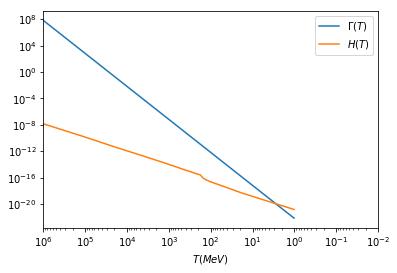

Here the freeze-out temperature is at the point where the two lines cross so:
Freeze out temperature = 2.714 MeV


In [6]:
## We calculate Gamma for HDM and then determine the intersection of Gamma with H to get the freeze out temperature.
## Is it fermionic or bosonic
b_or_f = 1
alpha = 0.01


def n_hot(T):
    return xhi_3/np.pi**2 * g_value(T) *  T**3 * b_or_f

G_f = 1.166 * 10**(-11)

def sigma(T):    
    return G_f**2 * T**2


def gamma_hot():
    Gamma_list_hot = []
    for T in Temperature:
        Gamma = n_hot(T) * sigma(T)
        Gamma_list_hot.append(Gamma)
    return Gamma_list_hot

gamma_list_hot = gamma_hot()
    
plt.plot(Temperature,gamma_list_hot, label = '$\Gamma(T)$')
plt.plot(Temperature, H_list, label = '$H(T)$')
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**6, 0.01)
plt.xlabel(r'$T(MeV)$')
plt.legend()
plt.show()

print ("Here the freeze-out temperature is at the point where the two lines cross so:")

def freeze_temp(Gamma_list, H_list):
    difference = []
    for i in range (0,len(Gamma_list)):
        difference.append(Gamma_list[i]-H_list[i])

    intersection = np.argwhere(np.diff(np.sign(difference))).flatten()
    intersection = int(intersection)
    return Temperature[intersection]

print('Freeze out temperature =', np.round(freeze_temp(gamma_list_hot, H_list),3), "MeV")

    

We can also do this this for cold dark matter. In this case the velocity cannot be set to 1 but instead can be obtained by  assuming the equipartition theorem holds:

$\frac{3}{2} kT = \frac{1}{2}mv^2 \rightarrow  v \approx \sqrt{\frac{3T}{m}} \rightarrow v = \sqrt{\frac{3}{20}}$

and for non relativistic particles the number density can be given by:

$n = g (\frac{mT}{2\pi})^{3/2}e^{-m/T}$

so now we get:

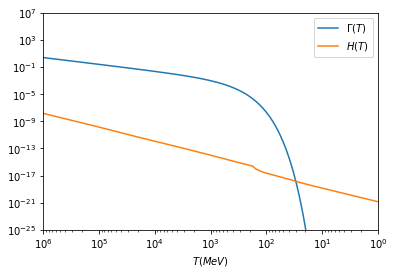

Here to, the point at which the lines cross is the freeze-out temperture so:
Freeze out temperature = 28.98 MeV


In [7]:
b_or_f = 1.0
### for the mass we can use the proton mass:
mass = 938

## Here we calculate Gamma for CDM and then determine the intersection of Gamma with H to get the freeze out temperature.
def n_cold(T,Mass):
    return g_value(T) * (Mass * T/(2*np.pi)**(3/2) * np.e**(-Mass/T)) 

def velocity_cold(T,mass):
    return np.sqrt(3*T/mass)

def sigma_cold(m):
    return G_f**2 * m**2
    
def gamma_cold(mass):
    Gamma_list_cold = []
    for T in Temperature:
        Gamma = n_cold(T,mass) * sigma_times_v
        Gamma_list_cold.append(Gamma)
    return Gamma_list_cold

Gamma_list_cold = gamma_cold(mass)
    

plt.plot(Temperature,Gamma_list_cold, label = '$\Gamma(T)$')
plt.plot(Temperature, H_list, label = '$H(T)$')
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**6, 1)
plt.ylim(10**-25, 10**7)
plt.xlabel(r'$T(MeV)$')
plt.legend()
plt.show()

print ("Here to, the point at which the lines cross is the freeze-out temperature so:")

print("Freeze out temperature =", np.round(freeze_temp(Gamma_list_cold, H_list),2),"MeV")



We now want to use this freeze-out temperature to calculate the abundance of dark matter relics. We can do this by using the formula:

$\Omega = \frac{\rho_{0}}{\rho_{crit}}  $

We can than use the fact that $Y_{fo} \equiv \frac{n_{fo}}{s_{fo}} = Y_{0} = \frac{n_{0}}{s_{0}}$ 

So:

$\rho = <m>n_{0} = <m> \frac{s_{0}}{s_{fo}} n_{fo}$

with $s = (..)g_{s}(T)T^{3}$. so we get:

$\Omega = \frac{<m> n}{\rho_{crit}} * \frac{g_{s}(T_{0})T_{0}^{3}}{g_{s}(T_{fo})T_{fo}^{3}} $

In the relativistic case, parts of this formula cancel each other out, since in the number density at Freeze-out are the factors:

$n_{fo}=\frac{g}{\pi^2}\zeta(3)T_{fo}^3$

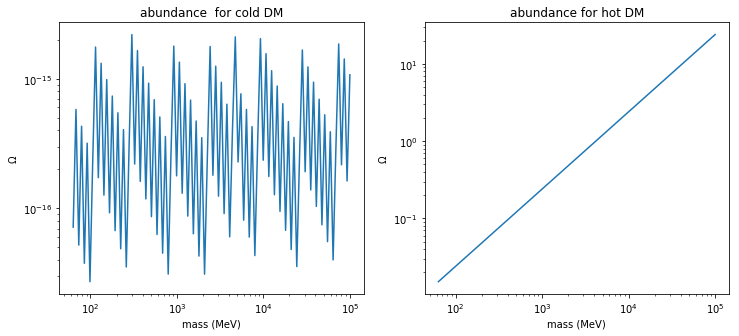

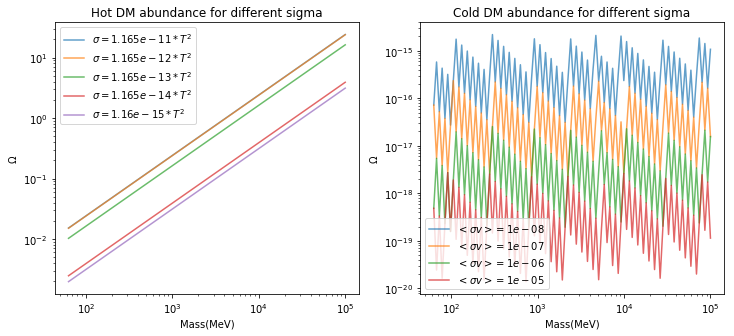

In [8]:
masses = np.logspace(1.8,5,100)

def sigma(T):    
    return G_f**2 * T**2

## Define a function which calculate and plot the present-abundance of hot and cold dark matter for different temperature.
def plotter():
    abundance_list_cold = []
    abundance_list_hot= []

    for m in masses:
        gamma_list = gamma_cold(m)
        T_fo = freeze_temp(gamma_list, H_list)
        abundance =  n_cold(T_fo,m) * g_ster(T_now) / g_ster(T_fo) * T_now**3 / T_fo**3 * m / rho_crit
        abundance_list_cold.append(abundance)


    for m in masses:
        gamma_list = gamma_hot()
        T_fo = freeze_temp(gamma_list, H_list)
        abundance =  n_hot(T_fo) * g_ster(T_now) / g_ster(T_fo) * T_now**3 / T_fo**3  * m / rho_crit
        abundance_list_hot.append(abundance)

    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))

    ax1.plot(masses, abundance_list_cold)
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_title('abundance  for cold DM')
    ax1.set_ylabel('$\Omega$')
    ax1.set_xlabel('mass (MeV)')
    ax2.plot(masses, abundance_list_hot)
    ax2.set_title('abundance for hot DM')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_ylabel('$\Omega$')
    ax2.set_xlabel('mass (MeV)')
    ax2.set_yscale("log")
    plt.show()
    
plotter()
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))

## Here we define 2 functions which calculate the present-abundance of hot and cold dark matter.
## Next we are using these to calculate and plot the present-abundance for different cross-sections for HDM and CDM.
def hot_plotter():
    abundance_list_hot = []
    
    for m in masses:
        gamma_list = gamma_hot()
        T_fo = freeze_temp(gamma_list, H_list)
        abundance =  n_hot(T_fo) * g_ster(T_now) / g_ster(T_fo) * T_now**3 / T_fo**3 * m / rho_crit
        abundance_list_hot.append(abundance)
        
    ax1.plot(masses,abundance_list_hot,label = '$\sigma = %s * T^2$' %G_f, alpha=0.7)
    
def cold_plotter():
    abundance_list_cold = []
    
    for m in masses:
        gamma_list = gamma_cold(m)
        T_fo = freeze_temp(gamma_list, H_list)
        abundance =  n_cold(T_fo,m) * g_ster(T_now) / g_ster(T_fo) * T_now**3 / T_fo**3 * m / rho_crit
        abundance_list_cold.append(abundance)
        
    ax2.plot(masses,abundance_list_cold, label = '$<\sigma v> = %s$' %sigma_times_v, alpha=0.7)
    
G_f_list = [ 1.165 * 10**(-11),  1.165 * 10**(-12), 1.165 * 10**(-13), 1.165 * 10**(-14), 1.16 * 10**(-15)]
sigma_times_v_list = [10**-8,10**-7,10**-6,10**-5]

for G_f in G_f_list:

    def sigma(T):    
        return G_f**2 * T**2

    hot_plotter()

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Mass(MeV)')
ax1.set_ylabel('$\Omega$')
ax1.set_title('Hot DM abundance for different sigma')
ax1.legend()


for sigma_times_v in sigma_times_v_list:
    cold_plotter()

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Mass(MeV)')
ax2.set_ylabel('$\Omega$')
ax2.set_title('Cold DM abundance for different sigma')
ax2.legend()

plt.show()


From our results we see that the present-abundance of CDM is independent of the mass. The small fluctuations are caused by the fact that our function of $g_*$ consist of some points instead of a smooth function. We can also conclude that the HDM is linear proportional to the mass. Because the abundance can't pass 1, there is a upper limit of the mass of HDM. In the bottom 2 graphs, the dependency of the cross-section with the abundance is shown.

Freeze-out however does not happen instantaneous. To take this into account we modify the analysis by allowing Y to change over time. Regarding Y as deviating around an equilibrium value denoted $Y_{eq}$ and introducing a shift parameter $\Delta$:

$\frac{\Delta(2+\Delta)}{(1+\Delta)} = \frac{1.25 x 10^{-35} g^{1/2}}{<\sigma v>} (\frac{(x-3/2) e^{x}}{x^{1/2}})$

with $\Delta = (Y - Y_{eq})/Y_{eq} $ and with:

$Y_{eq} = \frac{45}{2\pi^{4}} (\frac{\pi}{8})^{1/2} \frac{g_{x}}{g_{s}} x^{3/2} exp(-x)$

So if we use this we get the following figures for Y:

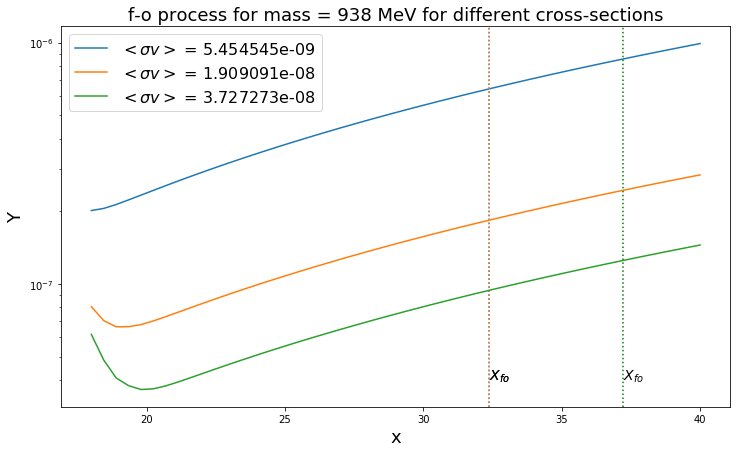

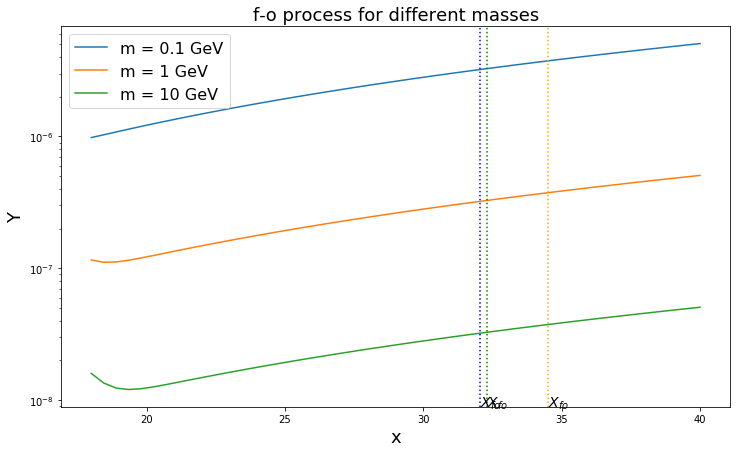

In [9]:
def gamma_cold2(mass,sigma_timesv):
    Gamma_list_cold = []
    for T in Temperature:
        Gamma = n_cold(T,mass) * sigma_timesv
        Gamma_list_cold.append(Gamma)
    return Gamma_list_cold

## We calculate Y in this function
def Y(x,m,sigma_times_v):
    T = m/x
    factor_1 = 1.25 * 10**-35 * g_ster(T*10**3) / (sigma_times_v * m)
    factor_2 = (x-1.5)*math.exp(x) / x**0.5
    D = Symbol('D')
    a = solve(factor_1 * factor_2 - D*(2+D)/(1+D),D)
    Y_eq = 45.0 / (2 * math.pi**4) * (math.pi/8)**0.5 * g_value(T)/g_ster(T*10**3)* x**1.5*math.exp(-x)
       
    if len(a) > 1:
        D2 =  a[1]
    else:
        D2 = a[0]
       
    Y = (1 + D2)*Y_eq    
    return Y

list_sigma_times_v = [1.2*10**-26,4.2*10**-26,8.2*10**-26]
masses = [0.1,1,10]
x_list = np.linspace(18,40,50)
y_list = []
list_color = ['blue','orange','green']
aa = 0

## This function plot the value of Y against m/T.
def Y_plotter(mass, sigmav):
    y_list = []
    for x in x_list:
        y_list.append(Y(x,mass, sigmav))
        
    mass_mev = mass*10**3
    sigma_time_v = sigmav / (2.2*10**-18)
    gamma_list = gamma_cold2(mass_mev,sigma_time_v)
    T_fo = freeze_temp(gamma_list, H_list)
    x_fo = mass_mev /  T_fo
    
    if plot_mass == True:
        plt.plot(x_list, y_list, label = "m = %s GeV" %mass)
        plt.axvline(x_fo,linestyle = ':',color = "%s" %list_color[aa] )
        plt.text(x_fo,9 * 10**-9, "$X_{fo}$",fontsize = 14)
    else:
        plt.plot(x_list, y_list, label = "$<\sigma v>$ = %e" %sigma_time_v)
        plt.axvline(x_fo,linestyle = ':',color = "%s" %list_color[aa] )
        plt.text(x_fo,4 * 10**-8, "$X_{fo}$",fontsize = 14)
        
    plt.yscale('log')
    plt.ylabel('Y', fontsize = 18)
    plt.xlabel('x', fontsize = 18)
    
## Next we plot Y for different masses and cross-sections.
mass = 0.938
plot_mass = False
plt.figure(figsize=(12,7))
for sigma_v in list_sigma_times_v:
    Y_plotter(mass, sigma_v)
    aa += 1
    
plt.title('f-o process for mass = 938 MeV for different cross-sections',fontsize = 18)
plt.legend(loc = 2,prop={'size': 16})
plt.show()

sigmav = 2.2*10**-26
aa = 0
plt.figure(figsize=(12,7))
plot_mass = True
for mass in masses:
    Y_plotter(mass, sigmav)
    aa += 1
    
plt.title('f-o process for different masses', fontsize = 18)
plt.legend(loc = 2,prop={'size': 16})
plt.show()

In the plots is x equal to m/T. The vertical dotted lines, denoted $x_{fo}$, are the corresponding estimated values from instantaneous freeze-out. As detailed in Steigman et al 2012, the deviations from equilibrium can grow over time, and some overshooting of the model might be due to the fact that the $d\Delta / d x$ dependence is not factored in. 